<a href="https://colab.research.google.com/github/bruna-calistrate/DataWrangling-Case1/blob/main/Case_1_Data_Wrangling_Daily_Happiness_%26_Employee_Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling e Data Cleaning

Se você fosse gerente em uma empresa, o que você faria
de diferente caso descobrisse que alguns de seus
funcionários estão pensando em sair? 

Daria um aumento, buscaria contratar outro ou tentaria ver como melhorar? De toda forma, ter essa informação seria útil e evitaria muitos problemas!

Neste exercício simularemos a etapa de Data Preparation através da limpeza e estruturação dos dados que servirão de insumo para a construção do modelo preditivo mencionado acima.



Daily Happiness & Employee Turnover


Is There a Relationship Between Employee Happiness and Job Turnover?


Dataset: https://www.kaggle.com/harriken/employeeturnover


## Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import numpy.ma as ma
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 

## Data Understanding

### Contextualização

No verão de 2016, em Barcelona, o CEO da myhappyforce, Alex Rios, explica o funcionamento de seu aplicativo onde funcionários registram diariamente o seu nível de felicidade no trabalho. Esse aplicativo é utilizado por empresas para rastrear a felicidade de seus empregados. 

Os dados foram disponibilidados de forma anonimizada para melhor entendimento do turnover de funcionários e para possibilitar a criação de um modelo que consiga predizer quais empregados irão sair da empresa.

### Importar arquivos

**df_votes** - voto de um funcionário ao abrir o aplicativo e responder à pergunta "Quão feliz você está no trabalho hoje?". Para votar, o funcionário indica o seu sentimento tocando em um dos quatro ícones na tela.

4 colunas e 221.232 linhas
* **employee**: número do funcionário
  * tipo int, sem valores nulos
* **companyAlias**: código hash da empresa
  * tipo object, sem valores nulos
* **voteDate**: data da votação 
  * tipo object deve ser convertido pra datetime, sem valores nulos
* **vote**: voto do empregado (1-4)
  * tipo int, sem valores nulos



In [2]:
df_votes = pd.read_csv('https://raw.githubusercontent.com/bruna-calistrate/DataWrangling-Case1/main/votes.csv')

df_votes.head()

,employee,companyAlias,voteDate,vote
0,31,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
1,33,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
2,79,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
3,94,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
4,16,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,2


In [3]:
df_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221232 entries, 0 to 221231
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   employee      221232 non-null  int64 
 1   companyAlias  221232 non-null  object
 2   voteDate      221232 non-null  object
 3   vote          221232 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 6.8+ MB


**df_comments** - após votar, uma nova tela aparece onde o funcionário pode incluir um comentário explicando o seu sentimento. Aqui os comentários estão anonimizados.

7 colunas e 82.756 linhas
* **employee**: número do funcionário
  * tipo int, sem valores nulos
* **companyAlias**: código hash da empresa
  * tipo object, sem valores nulos
* **commentId**: código hash do comentário
 * tipo object, sem valores nulos
* **txt**: conteúdo anonimizado do comentário, com a mesma quantidade de caracteres original
 * tipo object, com alguns valores nulos
* **likes**: quantidade de curtidas
  * tipo float deve ser convertido para int, contém 1 valor nulo
* **dislikes**: quantidade de descurtidas
  * tipo float, deve ser convertido para int, contém 1 valor nulo
* **commentDate**: data de postagem do comentário
  * tipo object deve ser convertido para datetime, contém 1 valor nulo

In [4]:
df_comments = pd.read_csv('https://raw.githubusercontent.com/bruna-calistrate/DataWrangling-Case1/main/comments_clean_anonimized.csv')

df_comments.head()

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,**********************************************...,4.0,0.0,Mon Mar 20 19:00:17 CET 2017
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,*****************************,1.0,2.0,Mon Mar 20 18:55:16 CET 2017
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,Mon Mar 20 16:44:02 CET 2017
3,135,56aec740f1ef260003e307d6,58cfefeee010990004e37f60,***************************,1.0,1.0,Mon Mar 20 16:06:08 CET 2017
4,225,56aec740f1ef260003e307d6,58cfd9b4e010990004e37f52,*********************************,3.0,2.0,Mon Mar 20 14:30:50 CET 2017


In [5]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82756 entries, 0 to 82755
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   employee      82756 non-null  int64  
 1   companyAlias  82756 non-null  object 
 2   commentId     82756 non-null  object 
 3   txt           82539 non-null  object 
 4   likes         82755 non-null  float64
 5   dislikes      82755 non-null  float64
 6   commentDate   82755 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 4.4+ MB


**df_interactions** - depois de comentar, uma nova tela aparece onde o funcionário pode ver os comentários de seus colegas com as ações de curtir ou descurtir.

5 colunas e 336.960 linhas
* **employee**: número do funcionário
 * tipo int, sem valores nulos
* **companyAlias**: código hash da empresa
 * tipo object, sem valores nulos
* **liked**: com ou sem curtida
 * tipo object deve ser convertido em bool, com 1 valor nulo
* **disliked**: com ou sem descurtida
 * tipo object deve ser convertido em bool, com 1 valor nulo
* **commentId**: código do comentário
 * tipo object, com 1 valor nulo

In [6]:
df_interactions = pd.read_csv('https://raw.githubusercontent.com/bruna-calistrate/DataWrangling-Case1/main/commentInteractions.csv')

df_interactions.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
3,24,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
4,382,56aec740f1ef260003e307d6,True,False,58d0179ae010990004e3806d


In [7]:
df_interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336960 entries, 0 to 336959
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   employee      336960 non-null  int64 
 1   companyAlias  336960 non-null  object
 2   liked         336959 non-null  object
 3   disliked      336959 non-null  object
 4   commentId     336959 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.9+ MB


**df_churn** - status do funcionário, se continua ou não na empresa (saiu ou foi demitido)

5 colunas e 4.847 linhas
* **employee**: número do funcionário
  * tipo int, sem valores nulos
* **companyAlias**: código hash da empresa
 * tipo object, sem valores nulos
* **numVotes**: quantidade de votos
  * tipo int, sem valores nulos
* **lastPartcipationDate**: data da última participação
 * tipo object deve ser convertido para datetime, com 1 valor nulo
* **stillExists**: se o funcionário ainda trabalha na empresa ou não
 * tipo bool, sem valores nulos

In [8]:
df_churn = pd.read_csv('https://raw.githubusercontent.com/bruna-calistrate/DataWrangling-Case1/main/churn.csv')

df_churn.head()

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,Thu Feb 23 12:48:04 CET 2017,True
1,-2,56aec740f1ef260003e307d6,0,Wed Jan 18 14:00:55 CET 2017,False
2,2,56aec740f1ef260003e307d6,72,Fri Mar 17 01:00:00 CET 2017,True
3,487,56aec740f1ef260003e307d6,14,Sat Nov 19 15:02:14 CET 2016,False
4,3,56aec740f1ef260003e307d6,22,Thu Feb 16 01:00:00 CET 2017,True


In [9]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee               4847 non-null   int64 
 1   companyAlias           4847 non-null   object
 2   numVotes               4847 non-null   int64 
 3   lastParticipationDate  4847 non-null   object
 4   stillExists            4847 non-null   bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 156.3+ KB


a) Qual a sua variável target?

A feature **employee** em conjunto com a **companyAlias**, ou seja, número do funcionário por empresa, criar uma nova coluna com o agrupamento dessas informações

b) Quais as colunas do seu dataset e podem te ajudar a prever a informação desejada?

* **vote**: para avaliar a sensação de felicidade diária dos funcionários
* **commentId**: código de cada comentário
* **likes** e **dislikes**: para avaliar o quanto outros colegas concordam com a avaliação individual
* **liked** e **disliked**: funcionários que curtiram ou descurtiram comentários de seus colegas
* **numVotes**: quantidade de avaliações por funcionário

c) Existem outras informações que poderiam te ajudar a prever?

Informações sobre o mercado de trabalho na Espanha em 2016

d) Como os 4 datasets se relacionam? Quais as chaves de cada um?

Todos datasets se relacionam através da combinação das features **employee** e **companyAlias**. Em complemento, os datasets de **comments** e **interations** também se relacionam através da feature **commentId**.

## Data Preparation

* Descrição do dataset
* Seleção dos dados
* Limpeza dos dados
* Construção dos dados
* Integração dos dados
* Formatação dos dados


### Limpeza dos dados

#### Correção das informações de data

In [10]:
df_votes['voteDate'] = pd.to_datetime(df_votes['voteDate'], 
                                      infer_datetime_format=True)
df_comments['commentDate'] = pd.to_datetime(df_comments['commentDate'], 
                                            infer_datetime_format=True)
df_churn['lastParticipationDate'] = pd.to_datetime(df_churn['lastParticipationDate'], 
                                                   infer_datetime_format=True)

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


#### Remoção de valores nulos e tratamento de colunas

* As linhas com apenas valores nulos das tabelas **df_interactions** e **df_comments**

In [11]:
df_interactions.dropna(axis=0,
                       how='any',
                       inplace=True)

In [12]:
df_interactions[['liked', 
                 'disliked']] = df_interactions[['liked', 
                                                 'disliked']].astype('bool')

In [13]:
df_interactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336959 entries, 0 to 336958
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   employee      336959 non-null  int64 
 1   companyAlias  336959 non-null  object
 2   liked         336959 non-null  bool  
 3   disliked      336959 non-null  bool  
 4   commentId     336959 non-null  object
dtypes: bool(2), int64(1), object(2)
memory usage: 10.9+ MB


In [14]:
df_comments.dropna(axis=0, how='any', thresh=4, inplace=True)

In [15]:
df_comments['carac'] = df_comments['txt'].str.len()

In [16]:
df_comments.drop(columns=['txt'], inplace=True)

In [17]:
df_comments['carac'].fillna(value=0,
                            inplace=True)

In [18]:
df_comments[['likes', 
             'dislikes', 
             'carac']] = df_comments[['likes', 
                                      'dislikes', 
                                      'carac']].astype('int64')

In [19]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82755 entries, 0 to 82754
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   employee      82755 non-null  int64         
 1   companyAlias  82755 non-null  object        
 2   commentId     82755 non-null  object        
 3   likes         82755 non-null  int64         
 4   dislikes      82755 non-null  int64         
 5   commentDate   82755 non-null  datetime64[ns]
 6   carac         82755 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 5.1+ MB


#### Remoção de valores duplicados

**df_votes** não possui valores duplicados

In [20]:
df_votes.shape

(221232, 4)

In [21]:
df_votes.drop_duplicates(inplace=False)
df_votes.shape

(221232, 4)

Em **df_comments**, mais de 40.000 entradas estão duplicadas e serão excluídas

In [22]:
df_comments.shape

(82755, 7)

In [23]:
df_comments.drop_duplicates(inplace=True)
df_comments.shape

(42018, 7)

Em **df_interactions**, existem 7 valores duplicados e serão excluídos

In [24]:
df_interactions.shape

(336959, 5)

In [25]:
df_interactions.drop_duplicates(inplace=True)
df_interactions.shape

(336952, 5)

**df_churn** não possui valores duplicados

In [26]:
df_churn.shape

(4847, 5)

In [27]:
df_churn.drop_duplicates(inplace=True)
df_churn.shape

(4847, 5)

### Visualização de dados

Construíndo uma pivot table para visualizar a quantidade e média de voto por funcionários

In [28]:
votos = pd.pivot_table(df_votes, 
                       index=['companyAlias', 'employee'],
                       values=['vote', 'voteDate'],
                       aggfunc={'vote': [np.mean, ma.count],
                                'voteDate': [min]})

votos.columns = [
                 '.'.join(col).strip() 
                 if col[1] != "" 
                 else col[0] 
                 for col in votos.columns.values
                 ]

A média de votos por funcionários está fortemente concentrada em 3, o que pode indicar um alto índice de felicidade geral nas empresas

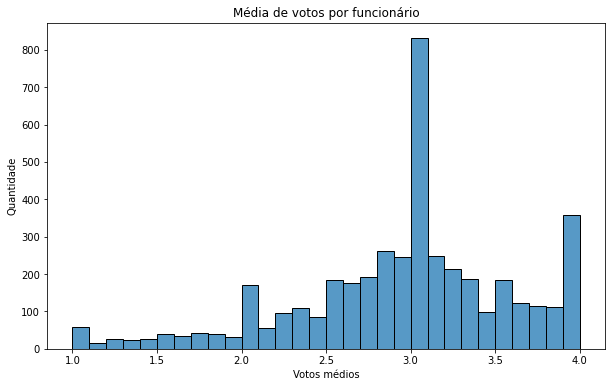

In [29]:
plt.figure(figsize=(10,6))

fig = sns.histplot(data=votos, 
                   x='vote.mean',
                   bins=30)

plt.title("Média de votos por funcionário")
plt.xlabel("Votos médios")
plt.ylabel("Quantidade")
plt.show()

Já visualizando a quantidade de votos por funcionário, é possível perceber que metade dos funcionários votou menos de 19 vezes, havendo alguns que votaram mais de 500 vezes.

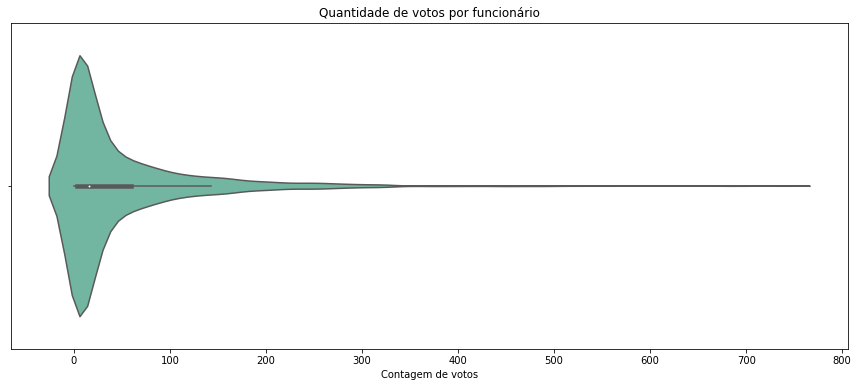

In [30]:
plt.figure(figsize=(15,6))

fig = sns.violinplot(data=df_churn, 
                     x='numVotes', inner='box',
                     palette='Set2'
                    )
plt.title("Quantidade de votos por funcionário")
plt.xlabel("Contagem de votos")
plt.show()

Já na distribuição absoluta dos votos, também é possível observar que a maioria dos votos se concentraram entre 3 e 4 pontos, corroborando com uma alta percepção de felicidade no ambiente de trabalho

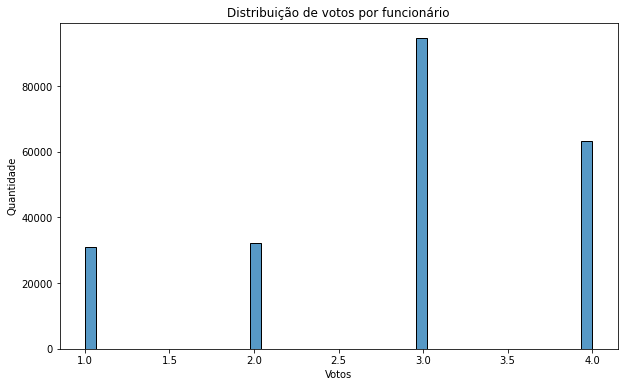

In [31]:
plt.figure(figsize=(10,6))

fig = sns.histplot(data=df_votes, 
                   x='vote')

plt.title("Distribuição de votos por funcionário")
plt.xlabel("Votos")
plt.ylabel("Quantidade")
plt.show()

Agora visualizando a distribuição dos comentários, pode-se verificar que até 75% possuíam menos de 117 caracteres

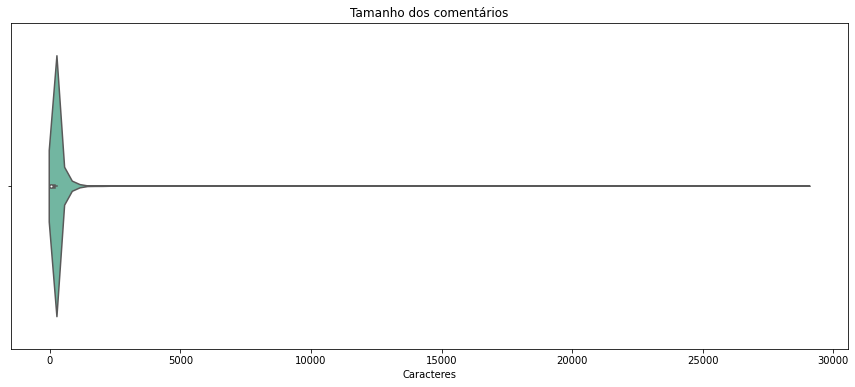

In [32]:
plt.figure(figsize=(15,6))

fig = sns.violinplot(data=df_comments, 
                     x='carac', inner='box',
                     palette='Set2'
                    )
plt.title("Tamanho dos comentários")
plt.xlabel("Caracteres")
plt.show()

Tratamento de outlier

In [33]:
df_comments.loc[df_comments['carac'] > 3000]

,employee,companyAlias,commentId,likes,dislikes,commentDate,carac
11768,47,5370af43e4b0cff95558c12a,5717b8129b442b000373eb88,2,1,2016-04-20 19:10:42,3131
14270,38,57bb2f0b3bae540003a8d453,5851aec3c8a2da000497c306,2,7,2016-12-14 21:36:38,29057
32527,110,54e52607e4b01191dc064966,558d509fe4b0bfce167bb099,26,2,2015-06-26 14:51:02,3748


Por ser pouco representativo, será removido do dataframe

In [34]:
df_comments = df_comments[df_comments.carac <= 3000]

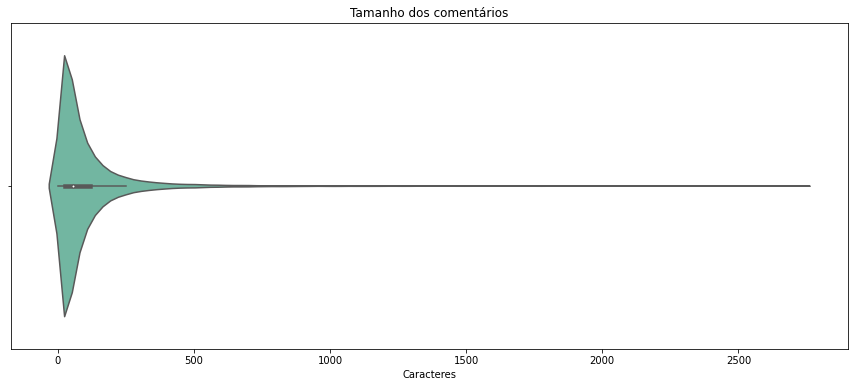

In [35]:
plt.figure(figsize=(15,6))

fig = sns.violinplot(data=df_comments, 
                     x='carac', inner='box',
                     palette='Set2'
                    )
plt.title("Tamanho dos comentários")
plt.xlabel("Caracteres")
plt.show()

Entre likes e dislikes, é possível notar uma tendencia de distribuição decrescente: quanto mais likes, menos dislikes - demonstrando a concordância dos funcionários com os seus colegas

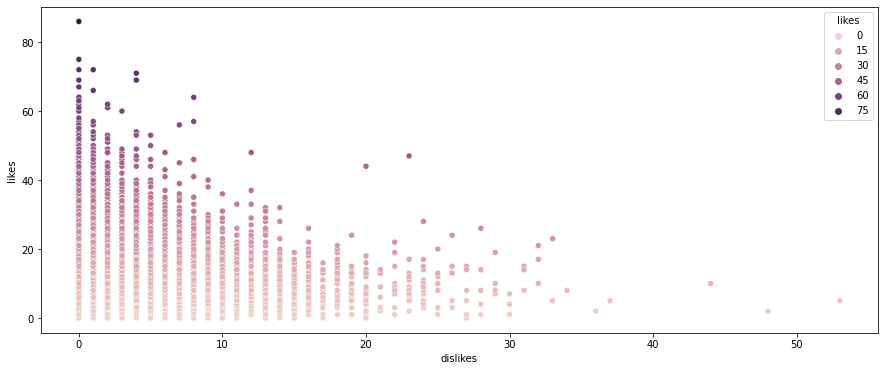

In [36]:
plt.figure(figsize=(15,6))

fig = sns.scatterplot(data=df_comments, 
                   x='dislikes',
                   y='likes',
                   hue='likes'
                  )

plt.show()

No geral, o tamanho dos comentários aumentou discretamente ao longo do tempo, mas se mantendo abaixo dos 1000 caracteres

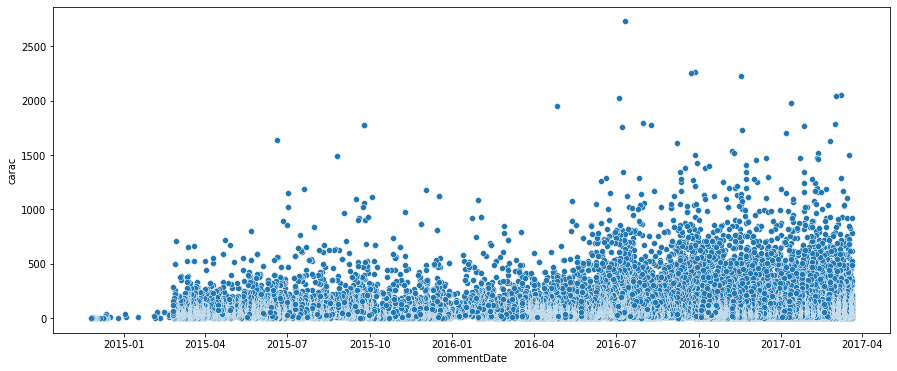

In [37]:
plt.figure(figsize=(15,6))

fig = sns.scatterplot(data=df_comments, 
                   x='commentDate',
                   y='carac'
                  )

plt.show()

Em relação à taxa de churn e aderência ao uso do aplicativo, é possível notar que:
* muitas empresas com baixa aderência ao uso do app, relacionar com a quantidade de funcionários
* algumas empresas com alta taxa de churn dos funcionários, que devem ser investigadas mais a fundo
  * 5370af43e4b0cff95558c12a
  * 54e52607e4b01191dc064966


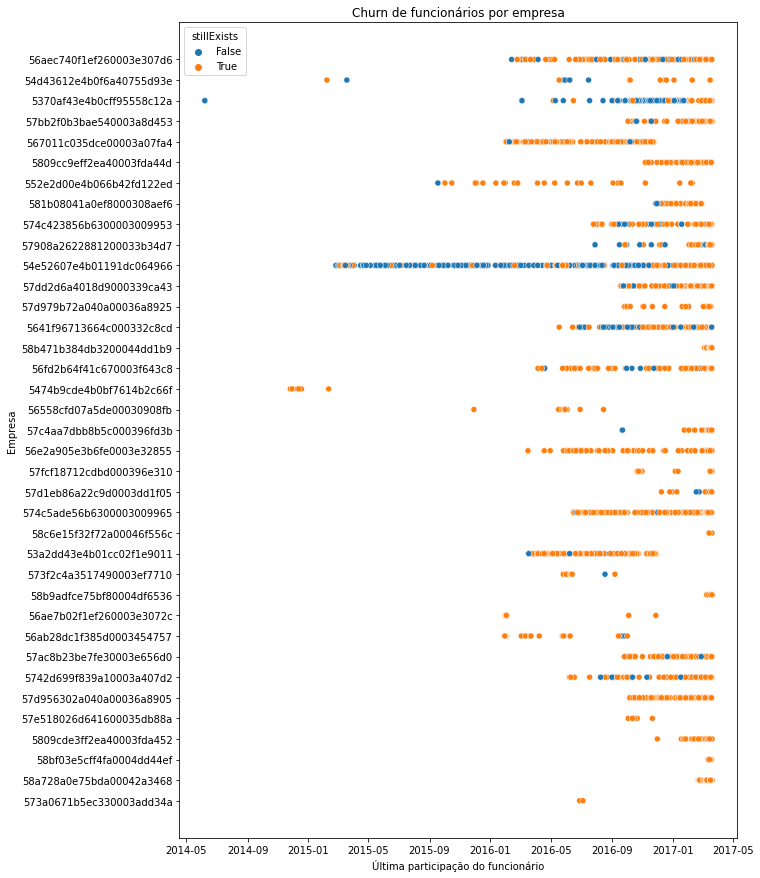

In [38]:
plt.figure(figsize=(10,15))

fig = sns.scatterplot(data=df_churn, 
                      x='lastParticipationDate',
                      y='companyAlias',
                      hue='stillExists')

plt.title("Churn de funcionários por empresa")
plt.xlabel("Última participação do funcionário")
plt.ylabel("Empresa")

plt.show()

### Construção de dados

Unir os dataframes **votos** com **df_churn** para visualizar o comportamento dos votos, quando começaram e a última participação e se o funcionário ainda está na empresa

In [39]:
votos.shape

(4377, 3)

In [40]:
df_churn.shape

(4847, 5)

In [41]:
votos_merge = votos[['vote.mean', 
                     'vote.count', 
                     'voteDate.min']].merge(df_churn, 
                                            on=['companyAlias', 
                                                'employee'], 
                                            how='right')

In [42]:
votos_merge.shape

(4847, 8)

Onde os dados inseridos são nulos, o funcionário não votou e também não está mais na empresa, então podem ser removidos

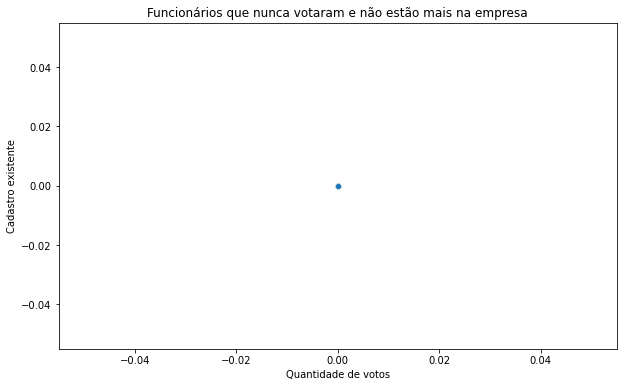

In [43]:
plt.figure(figsize=(10,6))

fig = sns.scatterplot(data=votos_merge.loc[
                                           pd.isnull(votos_merge['vote.count'])
                                           ], 
                      y='stillExists',
                      x='numVotes')

plt.title("Funcionários que nunca votaram e não estão mais na empresa")
plt.ylabel("Cadastro existente")
plt.xlabel("Quantidade de votos")

plt.show()

In [44]:
votos_merge.dropna(axis=0, inplace=True)

votos_merge.shape

(4418, 8)

In [45]:
votos_merge['vote.count'] = votos_merge['vote.count'].astype('int64')

Verificar a quantidade de dias de participação dos funcionários da primeira à última participação e se há alguma diferença na quantidade de dias

In [46]:
votos_merge['daysParticipation'] = (votos_merge['lastParticipationDate'] 
                                    - votos_merge['voteDate.min']).dt.days
votos_merge['diffNumVotes'] = (votos_merge['numVotes'] 
                               - votos_merge['vote.count'])

Verificando a diferença na contagem de votos para alguns funcionários em **diffNumVotes**, a coluna **numVotes** será removida

In [47]:
votos_merge.loc[votos_merge['diffNumVotes'] < 0]

,companyAlias,employee,vote.mean,vote.count,voteDate.min,numVotes,lastParticipationDate,stillExists,daysParticipation,diffNumVotes
361,54d43612e4b0f6a40755d93e,9,3.222222,9,2015-02-06 01:00:00,0,2015-03-18 20:23:42,False,40,-9
378,5370af43e4b0cff95558c12a,266,3.636364,11,2016-12-13 01:00:00,0,2017-03-03 16:59:25,False,80,-11
591,5370af43e4b0cff95558c12a,35,3.000000,4,2016-02-22 01:00:00,0,2016-03-04 10:55:34,False,11,-4
855,567011c035dce00003a07fa4,157,2.000000,2,2016-04-08 02:00:00,0,2016-04-15 12:27:58,False,7,-2
857,567011c035dce00003a07fa4,135,2.888889,9,2016-02-02 01:00:00,0,2016-04-05 09:15:05,False,63,-9
1097,552e2d00e4b066b42fd122ed,10,3.000000,14,2015-09-25 02:00:00,0,2015-12-02 09:22:29,False,68,-14
1099,552e2d00e4b066b42fd122ed,2,2.647059,17,2015-04-29 02:00:00,0,2015-09-17 17:43:48,False,141,-17
1422,57908a2622881200033b34d7,59,4.000000,1,2017-03-07 01:00:00,0,2017-03-07 21:30:21,False,0,-1
1424,57908a2622881200033b34d7,35,3.000000,1,2016-12-16 01:00:00,0,2016-12-16 12:50:16,False,0,-1
1427,57908a2622881200033b34d7,27,3.500000,4,2016-09-30 02:00:00,0,2016-10-26 18:23:32,False,26,-4


In [48]:
votos_merge.drop(columns=['numVotes', 'diffNumVotes'], 
                 axis=1, inplace=True)

Em relação à participação

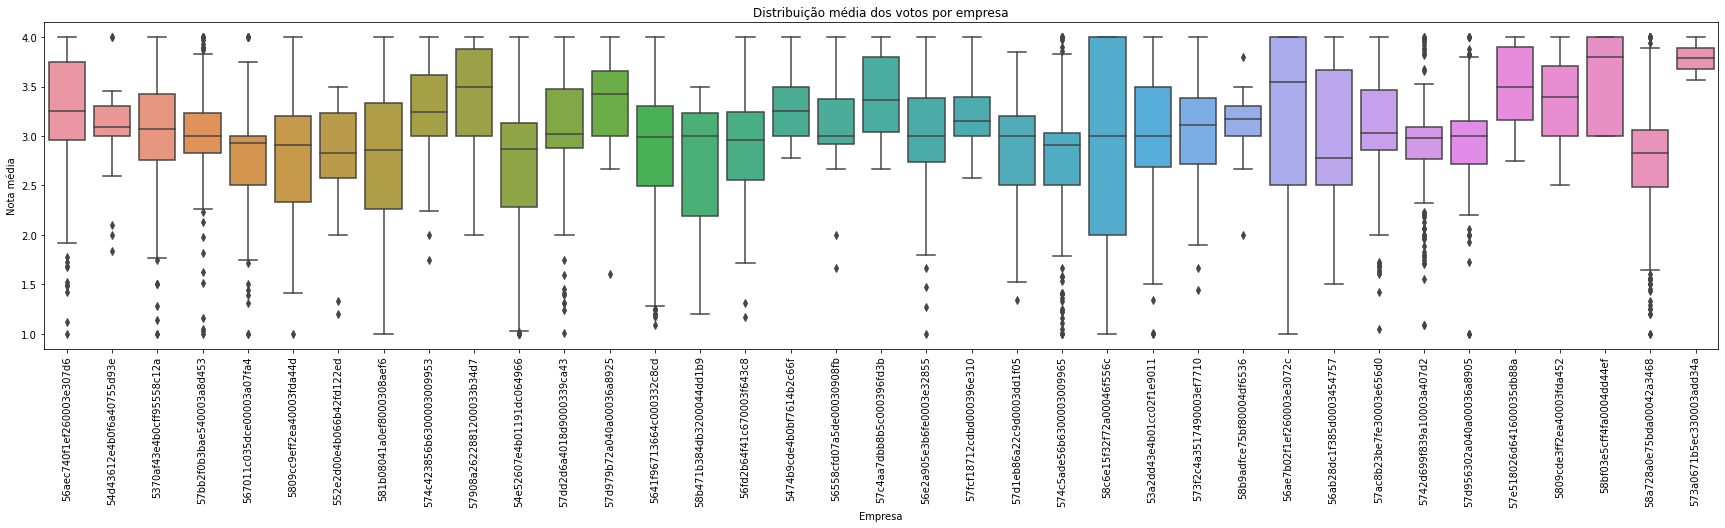

In [49]:
plt.figure(figsize=(30,6))

fig = sns.boxplot(data=votos_merge, 
                   y='vote.mean',
                   x='companyAlias')

plt.title("Distribuição média dos votos por empresa")
plt.ylabel("Nota média")
plt.xlabel("Empresa")
plt.xticks(rotation=90)
plt.show()

In [60]:
empresas = pd.pivot_table(votos_merge,
                          values=['vote.mean', 'vote.count'],
                          index=['companyAlias'],
                          columns=['stillExists'],
                          aggfunc={'vote.mean': [np.mean],
                                   'vote.count': [ma.count]},
                          fill_value=0)

In [61]:
empresas.columns = [
                    '.'.join(map(str, col)).strip() 
                    if col[1] != "" 
                    else col[0] 
                    for col in empresas.columns.values
                    ]

In [62]:
empresas

,vote.count.count.False,vote.count.count.True,vote.mean.mean.False,vote.mean.mean.True
companyAlias,,,,
5370af43e4b0cff95558c12a,173,51,2.971057,3.348766
53a2dd43e4b01cc02f1e9011,12,132,3.419580,2.920759
5474b9cde4b0bf7614b2c66f,0,10,0.000000,3.309596
54d43612e4b0f6a40755d93e,7,14,3.017713,3.038799
54e52607e4b01191dc064966,288,297,2.775864,2.689954
552e2d00e4b066b42fd122ed,4,25,2.823529,2.750699
5641f96713664c000332c8cd,39,185,2.798666,2.864914
56558cfd07a5de00030908fb,0,12,0.000000,2.984127
567011c035dce00003a07fa4,11,154,2.832034,2.786026
